<h1> Importing </h1>

In [68]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
#import dataset
df = pd.read_csv("sars2003.csv")

<h1> Basic understanding on dataset </h1>

In [17]:
#rows, columns -> 2538 rows and 5 columns
print(f"This dataset has {df.shape[0]} rows and {df.shape[1]} columns")

This dataset has 2538 rows and 5 columns


In [19]:
#any nulls? 
df.isnull().values.any()
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2538 entries, 0 to 2537
Data columns (total 5 columns):
Date                            2538 non-null object
Country                         2538 non-null object
Cumulative number of case(s)    2538 non-null int64
Number of deaths                2538 non-null int64
Number recovered                2538 non-null int64
dtypes: int64(3), object(2)
memory usage: 99.2+ KB


In [20]:
#column names
print(df.columns)
#column types
print(df.dtypes)

Index(['Date', 'Country', 'Cumulative number of case(s)', 'Number of deaths',
       'Number recovered'],
      dtype='object')
Date                            object
Country                         object
Cumulative number of case(s)     int64
Number of deaths                 int64
Number recovered                 int64
dtype: object


In [7]:
#how does it look? 
df.head(10)

,Date,Country,Cumulative number of case(s),Number of deaths,Number recovered
0,2003-03-17,Germany,1,0,0
1,2003-03-17,Canada,8,2,0
2,2003-03-17,Singapore,20,0,0
3,2003-03-17,"Hong Kong SAR, China",95,1,0
4,2003-03-17,Switzerland,2,0,0
5,2003-03-17,Thailand,1,0,0
6,2003-03-17,Viet Nam,40,1,0
7,2003-03-18,Germany,2,0,0
8,2003-03-18,Canada,8,2,0
9,2003-03-18,China,0,0,0


In [16]:
#stat summary
df.describe()

,Cumulative number of case(s),Number of deaths,Number recovered
count,2538.000000,2538.000000,2538.000000
mean,219.211978,17.812845,134.678487
std,825.024564,61.425627,581.595350
min,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000
50%,3.000000,0.000000,2.000000
75%,14.750000,2.000000,9.000000
max,5329.000000,348.000000,4941.000000


In [15]:
# date ranges
print('Earliest day is ' + min(df['Date']))
print('Last day is ' + max(df['Date']))

Earliest day is 2003-03-17
Last day is 2003-07-11


In [58]:
#how many countries
df['Country'].nunique()
#or also can use.. 
df['Country'].value_counts().count()

37

In [53]:
#countries and how many. 
df['Country'].value_counts()

China                   96
Germany                 96
Thailand                96
Canada                  96
Hong Kong SAR, China    96
Singapore               96
United Kingdom          95
Viet Nam                95
Taiwan, China           95
Switzerland             94
United States           94
Italy                   92
Republic of Ireland     92
France                  90
Romania                 87
Spain                   86
Brazil                  81
Malaysia                79
Kuwait                  75
South Africa            74
Sweden                  72
Philippines             72
Indonesia               72
Mongolia                69
India                   64
Republic of Korea       59
Macao SAR, China        58
New Zealand             56
Colombia                53
Finland                 51
Russian Federation      31
Bulgaria                20
Japan                   19
Australia               17
Poland                  10
Belgium                  5
Slovenia                 5
N

In [63]:
#by countries, stat
df.groupby('Country').nunique()

,Date,Country,Cumulative number of case(s),Number of deaths,Number recovered
Country,,,,,
Australia,17,1,5,1,4
Belgium,5,1,1,1,1
Brazil,81,1,3,1,3
Bulgaria,20,1,1,1,1
Canada,96,1,52,24,48
China,95,1,53,55,69
Colombia,53,1,1,1,1
Finland,51,1,1,1,2
France,90,1,6,2,4


<h1> Cleaning </h1>

In [31]:
#copy the df so I don't have the change to original dataset
sarsdf = df.copy()

In [33]:
#change the data type for date
sarsdf['Date'] = pd.to_datetime(sarsdf['Date'])
#check 
sarsdf.dtypes

Date                            datetime64[ns]
Country                                 object
Cumulative number of case(s)             int64
Number of deaths                         int64
Number recovered                         int64
dtype: object

In [34]:
#rename some column names
sarsdf = sarsdf.rename(columns = {
                                                        'Cumulative number of case(s)' : 'Confirmed',
                                                        'Number of deaths' : 'Death',
                                                        'Number recovered' : 'Recovered'
                                                        })
#check
sarsdf.columns

Index(['Date', 'Country', 'Confirmed', 'Death', 'Recovered'], dtype='object')

<h1> Visualization </h1>

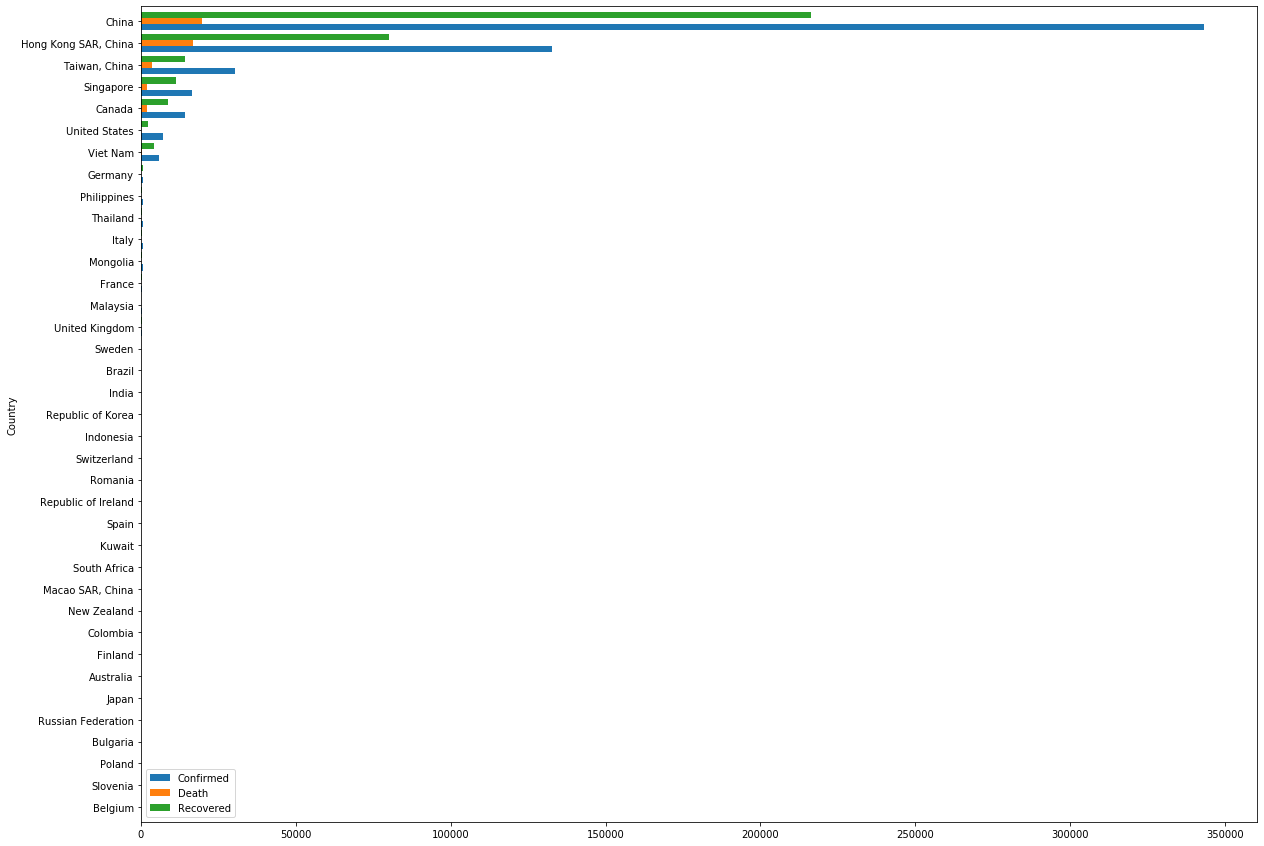

In [67]:
#bar graph
ax = sarsdf.groupby(['Country']).sum().sort_values("Confirmed").plot.barh(figsize=(20,15), width = 0.85)

In [79]:
#over time for confirmed, death and recovered cases worldwide
by_date = sarsdf.groupby('Date')['Confirmed', 'Death', 'Recovered'].sum().reset_index()
#by_date

In [80]:
#melt it 
melt_by_date = by_date.melt(id_vars ='Date', value_vars=['Confirmed', 'Death', 'Recovered'])
#melt_by_date

In [81]:
fig = px.line(melt_by_date, x = 'Date', y= 'value', color = 'variable', title = 'Worldwide Confirmed, Recovered, and Death over Time')
fig.show()